In [56]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
pd.set_option('display.max_columns', 25)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, r2_score

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

import datetime as dt


In [33]:
df = pd.read_csv('reference_date_5.csv')

trump = df[df['trump_classification_binary'] ==1]

In [34]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'hour', 'linked', 'hash', 'dot',
       'polarity', 'subjectivity', 'year', 'month', 'day', 'minute', 'text',
       'trump_classification_binary', 'trump_classification_proba',
       'exist_stock', 'exist_market', 'exist_agreement', 'exist_negotiator',
       'exist_negotiation', 'exist_trade', 'exist_china', 'exist_economy',
       'exist_job', 'exist_tariff', 'exist_employment', 'exist_s&p',
       'exist_auto', 'exist_farmer', 'word_mentions', 'DT', 'weekday',
       'ref_date'],
      dtype='object')

In [35]:
trump

,Unnamed: 0,Unnamed: 0.1,hour,linked,hash,dot,polarity,subjectivity,year,month,day,minute,...,exist_china,exist_economy,exist_job,exist_tariff,exist_employment,exist_s&p,exist_auto,exist_farmer,word_mentions,DT,weekday,ref_date
0,0,0,11,False,0,0,0.450000,0.833333,2016,11,9,36,...,0,0,0,0,0,0,0,0,0,2016-11-09 00:00:00,2,2016-11-10 00:00:00
2,2,2,2,False,0,0,0.580000,0.676667,2016,11,11,10,...,0,0,0,0,0,0,0,0,0,2016-11-11 00:00:00,4,2016-11-11 00:00:00
3,3,3,2,False,0,0,0.009375,0.675000,2016,11,11,19,...,0,0,0,0,0,0,0,0,0,2016-11-11 00:00:00,4,2016-11-11 00:00:00
4,4,4,11,False,0,0,0.410000,0.563333,2016,11,11,14,...,0,0,0,0,0,0,0,0,0,2016-11-11 00:00:00,4,2016-11-11 00:00:00
5,5,5,13,False,0,0,0.295455,0.584848,2016,11,11,33,...,0,0,0,0,0,0,0,0,0,2016-11-11 00:00:00,4,2016-11-14 00:00:00
7,7,7,15,False,0,0,0.850000,0.487500,2016,11,12,5,...,0,0,0,0,0,0,0,0,0,2016-11-12 00:00:00,5,2016-11-14 00:00:00
8,8,8,14,False,0,0,-0.086667,0.773333,2016,11,13,16,...,0,0,0,0,0,0,0,0,0,2016-11-13 00:00:00,6,2016-11-14 00:00:00
9,9,9,14,False,0,0,-0.700000,0.666667,2016,11,13,43,...,0,0,0,0,0,0,0,0,0,2016-11-13 00:00:00,6,2016-11-14 00:00:00
10,10,10,14,False,0,0,0.887500,0.700000,2016,11,13,45,...,0,0,0,0,0,0,0,0,0,2016-11-13 00:00:00,6,2016-11-14 00:00:00
11,11,11,15,False,0,0,0.925000,0.566667,2016,11,13,23,...,0,0,0,0,0,0,0,0,0,2016-11-13 00:00:00,6,2016-11-14 00:00:00


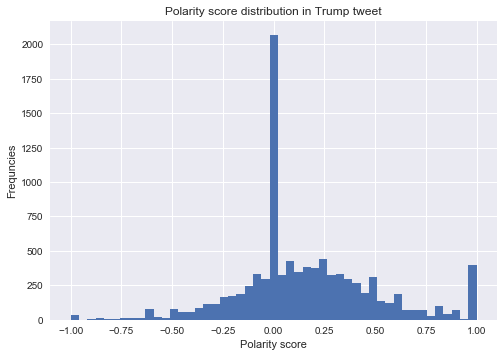

In [62]:
plt.hist(df.polarity, bins=np.linspace(-1, 1, 50))

plt.xlabel('Polarity score')
plt.ylabel('Frequncies')
plt.title('Polarity score distribution in Trump tweet')

plt.grid(True)
plt.show()

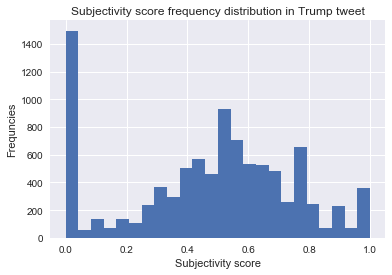

In [48]:
# fig, ax = plt.subplots(figsize=(20, 10)) 

plt.hist(df.subjectivity, bins=np.linspace(0, 1, 25))

plt.xlabel('Subjectivity score')
plt.ylabel('Frequncies')
plt.title('Subjectivity score frequency distribution in Trump tweet')

plt.grid(True)
plt.show()

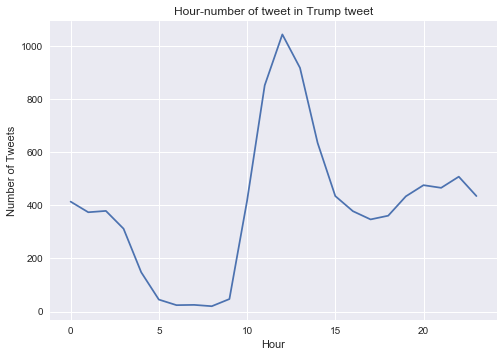

In [60]:
hour_count = df.hour.value_counts()

sns.lineplot(hour_count.index, hour_count.values)

plt.xlabel('Hour')
plt.ylabel('Number of Tweets')
plt.title('Hour-number of tweet in Trump tweet')

plt.grid(True)
plt.show()

# plt.hist(df.hour, bins=np.linspace(0, 24))